In [1]:
import pandas as pd
import os

data_folder = "data"  
required_columns = [
    'ConvertedCompYearly',  
    'YearsCodePro',         
    'Country',              
    'EdLevel',              
    'DevType',              
    'Employment',          
]


combined_data = pd.DataFrame()
year = 2020

for file_name in os.listdir(data_folder):
    year +=1
    if file_name.endswith(".csv"): 
        file_path = os.path.join(data_folder, file_name)
        data = pd.read_csv(file_path)
        filtered_data = data[[col for col in required_columns if col in data.columns]]
        if filtered_data.empty:
            print(f"Tệp {file_name} không có cột phù hợp, bỏ qua.")
            continue

        sampled_data = filtered_data.sample(n=min(1000, len(filtered_data)), random_state=42)

        sampled_data['Year'] = year
        combined_data = pd.concat([combined_data, sampled_data], ignore_index=True)



In [2]:
combined_data.to_csv('FINAL_DATA.csv', index=False)

In [3]:
combined_data

,ConvertedCompYearly,YearsCodePro,Country,EdLevel,DevType,Employment,Year
0,50268.0,7,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end;Developer, desktop or ent...",Employed full-time,2021
1,92450.0,9,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, mobile;Academic researcher","Independent contractor, freelancer, or self-em...",2021
2,NaN,Less than 1 year,Mexico,Some college/university study without earning ...,"Developer, desktop or enterprise applications;...",Employed part-time,2021
3,9228.0,1,Malaysia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, mobile",Employed full-time,2021
4,135000.0,2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, mobile",Employed full-time,2021
...,...,...,...,...,...,...,...
3995,NaN,25,United States of America,Some college/university study without earning ...,"Developer, full-stack","Independent contractor, freelancer, or self-em...",2024
3996,NaN,20,Bolivia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",2024
3997,88073.0,6,Belgium,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, game or graphics","Employed, full-time",2024
3998,NaN,12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Engineering manager,"Employed, full-time",2024


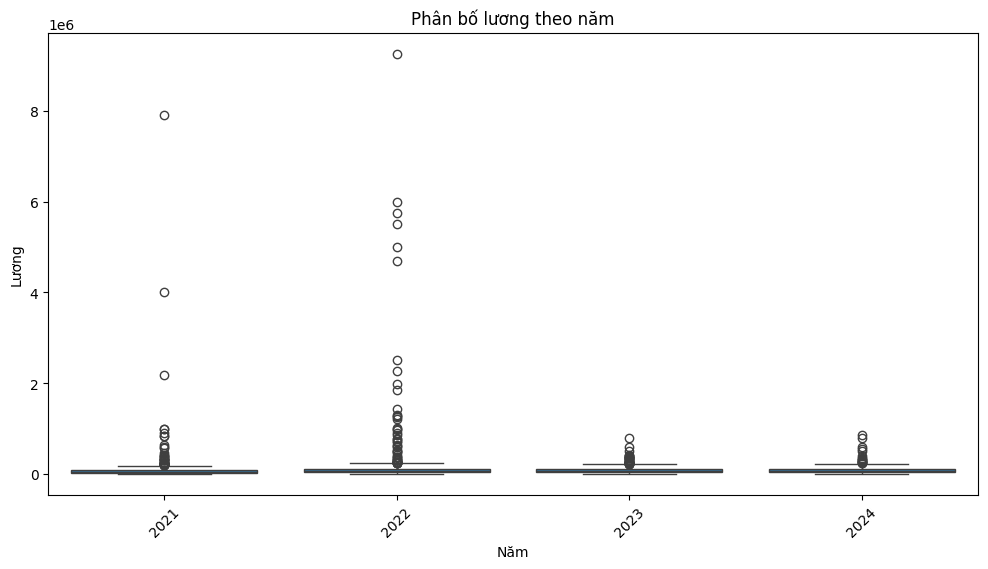

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Year', y='ConvertedCompYearly')
plt.title('Phân bố lương theo năm')
plt.xlabel('Năm')
plt.ylabel('Lương')
plt.xticks(rotation=45)
plt.show()


In [5]:
combined_data[combined_data['ConvertedCompYearly'].isna()]

,ConvertedCompYearly,YearsCodePro,Country,EdLevel,DevType,Employment,Year
2,NaN,Less than 1 year,Mexico,Some college/university study without earning ...,"Developer, desktop or enterprise applications;...",Employed part-time,2021
8,NaN,NaN,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Employed full-time,2021
14,NaN,5,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Employed full-time,2021
15,NaN,3,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end;Developer, back-end",Employed full-time,2021
16,NaN,26,Finland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack",Employed full-time,2021
...,...,...,...,...,...,...,...
3994,NaN,4,Argentina,Some college/university study without earning ...,"Developer, back-end","Employed, full-time;Student, part-time",2024
3995,NaN,25,United States of America,Some college/university study without earning ...,"Developer, full-stack","Independent contractor, freelancer, or self-em...",2024
3996,NaN,20,Bolivia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",2024
3998,NaN,12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Engineering manager,"Employed, full-time",2024


Gần 1 nửa là NULL

Phân loại EdLevel, nhóm lương theo và chia trung bình điền vào